In [372]:
import numpy as np
import random

from genome_file import read_genome, write_genome

In [373]:
# with open('genome.txt', 'w') as gfile:
#     gfile.write('test')

In [374]:
# def write_genome(gene_groups, fname = 'genome.txt'):
#     with open(fname, 'w') as gfile:
#         for i in range(len(gene_groups)):
#             gfile.write('>g' + str(i) + '\n')
#             for g in gene_groups[i]:
#                 if g[0] == g[-1] and len(g) >= 2:
#                     gfile.write('C: ' + ' '.join([str(x) for x in g[:-1]]) + '\n')
#                 else:
#                     gfile.write('L: ' + ' '.join([str(x) for x in g]) + '\n')
#             gfile.write('\n')

In [375]:
# write_genome([[[1,2,3,-4,-5,6], [7,8,-9,-10]], [[1,2,3,5,4,6], [7,8,-9,-10,7]]])

In [376]:
# def read_genome(fname = 'genome.txt'):
#     gene_groups = []
#     with open(fname, 'r') as gfile:        
#         gene = []
#         tag = False
        
#         for gline in gfile:
#             if gline.startswith('>'):
#                 if tag and gene:
#                     gene_groups.append(gene)
#                 tag = True
#                 gene = []
#                 continue
            
#             genes = gline.strip().split()
#             if genes == []:
#                 continue
#             if genes[0] == 'C:':
#                 genes.append(genes[1])
#             elif genes[0] != 'L:':
#                 continue
#             gene.append([int(x) for x in genes[1:]])
#         if gene:
#             gene_groups.append(gene)
#     return gene_groups

In [280]:
def trans_circle(g, p1, p2):
    g = g[:-1]
    p1 %= len(g)
    p2 %= len(g)
    
    if p1 == p2:
        return [g[p1:] + g[:p1]]
    if p2 < p1:
        p1, p2 = p2, p1
        
    if random.random() < 0.5:
        c0 = g[0:p1] + [-x for x in reversed(g[p1:p2])] + g[p2:]
        return [c0 + c0[0:1]]
    else:
        c1 = g[0:p1] + g[p2:]
        c2 = g[p1:p2]
        return [c1 + c1[0:1], c2 + c2[0:1]]

In [281]:
def trans_linear(g, p1, p2):
    size = len(g) + 1
    p1 %= size
    p2 %= size
    
    if p1 == p2:        
        return [g]
    if p2 < p1:
        p1, p2 = p2, p1
        
    if p1 == 0 and p2 == len(g):
        return [g + g[0:1]]
    
    if random.random() < 0.5:
        return [g[0:p1] + [-x for x in reversed(g[p1:p2])] + g[p2:]]
    else:
        return [g[0:p1] + g[p2:], g[p1:p2] + g[p1:p1+1]]

def trans(g, p1, p2):
    if g[0] == g[-1] and len(g) >= 2:
        return trans_circle(g, p1, p2)
    return trans_linear(g, p1, p2)

In [303]:
def trans_cross(g1, g2, p1, p2):
    rand_op = random.random()
    if g1[0] == g1[-1] and g2[0] == g2[-1] and len(g1) >= 2 and len(g2) >= 2:
        # circle and circle
        if rand_op < 0.5:
            res = g1[:p1] + g2[p2:-1] + g2[:p2] + g1[p1:-1]          
        else:
            res = g1[:p1] + [-x for x in reversed(g2[:p2])] + \
                    [-x for x in reversed(g2[p2:-1])] + g1[p1:-1]
        return [res + res[0:1]]
        
    if (g1[0] != g1[-1] or len(g1) == 1) and (g2[0] != g2[-1] or len(g2) == 1):
        # linear and linear
        if rand_op < 0.5:
            r1 = g1[:p1] + g2[p2:]
            r2 = g2[:p2] + g1[p1:]
        else:
            r1 = g1[:p1] + [-x for x in reversed(g2[:p2])]
            r2 = [-x for x in reversed(g2[p2:])] + g1[p1:]
        return [x for x in [r1, r2] if x!=[] ]
        
    # linear and circle
    if g1[0] == g1[-1] and len(g1) >= 2:
        c, l = g1, g2
        cp, lp = p1, p2
    else:
        c, l = g2, g1
        cp, lp = p2, p1
    if rand_op < 0.5:
        return [l[:lp] + c[cp:-1] + c[:cp] + l[lp:]]
    else:
        return [l[:lp] + [-x for x in reversed(c[:cp])] + 
                [-x for x in reversed(c[cp:-1])] + l[lp:]]

In [286]:
def trans_op(g, p1, p2):
    size_list = []
    for gene in g:
        size = len(gene)
        if gene[0] == gene[-1] and size >=2 :
            size -= 2
        size_list.append(size)
    p1 %= sum(size_list) + len(size_list)
    p2 %= sum(size_list) + len(size_list)
        
    t1, t2 = 0, 0
    if p1 > p2:
        p2, p1 = p1, p2
    for t1 in range(len(size_list)):
        if p1 <= size_list[t1]:
            break
        p1 -= size_list[t1] + 1
    for t2 in range(len(size_list)):
        if p2 <= size_list[t2]:
            break
        p2 -= size_list[t2] + 1
    # print(t1, p1, t2, p2)
    
    if t1 == t2:
        res = trans(g[t1], p1, p2)
        return g[:t1] + res + g[t1+1:]
    
    res = trans_cross(g[t1], g[t2], p1, p2)
    return g[:t1] + g[t1 + 1:t2] + g[t2 + 1:] + res

In [ ]:
# tmp = [list(range(1, 2001))]
# print(tmp)
# for i in range(5000000):
#     tmp = trans_op(tmp, random.randint(0,3000), random.randint(0,3000))
#     untmp = []
#     for x in tmp:
#         untmp += x
#     if np.unique(untmp).size != 2000:
#         print('error', tmp)
#     if i%50000 == 0:
#         print(i, tmp)
# print(tmp)

In [320]:
genes = []
tmp = [list(range(1, 21))]
genes.append(tmp)
for i in range(50):
    tmp = trans_op(tmp, random.randint(0,3000), random.randint(0,3000))
    genes.append(tmp)

In [336]:
for x in genes:
    print(x)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
[[1, 13, 14, 15, 16, 17, 18, 19, 20], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 2]]
[[1, 13, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, -11, -10, 19, 20]]
[[-11, -10, 19, 20], [1, 13, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, 1]]
[[-11, -10, 19, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, 1, 13, 20]]
[[-11, -10, 19, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, 1, 13, 20]]
[[-11, -10, 19, 14, 15, 16, 17, 18, 7, 8, 9, -6, -5, -4, -3, -2, -12, 1, 13, 20]]
[[-11, -3, -2, -12, 1, 13, 20], [-10, 19, 14, 15, 16, 17, 18, 7, 8, 9, -6, -5, -4, -10]]
[[-11, -3, -2, -12, 1, 13, 20], [7, 8, 9, -6, -5, -4, -10, 19, 14, 15, 16, 17, 18]]
[[-11, -3, -4, -10, 19, 14, 15, 16, 17, 18], [7, 8, 9, -6, -5, -2, -12, 1, 13, 20]]
[[-11, -3, -4, -10, 19, 14, 15, 16, 17, 18], [7, 8, 9, 12, 2, 5, 6, 1, 13, 20]]
[[-11, -3, -4, -10, 19, 12, 2, 5, 6, 1, 13, 20], [7, 8, 9, 14, 15, 16, 17, 18]]
[[-

In [339]:
test = read_genome()

In [341]:
for x in test:
    print(x)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
[[1, 13, 14, 15, 16, 17, 18, 19, 20], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 2]]
[[1, 13, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, -11, -10, 19, 20]]
[[-11, -10, 19, 20], [1, 13, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, 1]]
[[-11, -10, 19, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, 1, 13, 20]]
[[-11, -10, 19, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, 1, 13, 20]]
[[-11, -10, 19, 14, 15, 16, 17, 18, 7, 8, 9, -6, -5, -4, -3, -2, -12, 1, 13, 20]]
[[-11, -3, -2, -12, 1, 13, 20], [-10, 19, 14, 15, 16, 17, 18, 7, 8, 9, -6, -5, -4, -10]]
[[-11, -3, -2, -12, 1, 13, 20], [7, 8, 9, -6, -5, -4, -10, 19, 14, 15, 16, 17, 18]]
[[-11, -3, -4, -10, 19, 14, 15, 16, 17, 18], [7, 8, 9, -6, -5, -2, -12, 1, 13, 20]]
[[-11, -3, -4, -10, 19, 14, 15, 16, 17, 18], [7, 8, 9, 12, 2, 5, 6, 1, 13, 20]]
[[-11, -3, -4, -10, 19, 12, 2, 5, 6, 1, 13, 20], [7, 8, 9, 14, 15, 16, 17, 18]]
[[-

In [342]:
genes == test

True

In [343]:
genes[3], test[3]

([[-11, -10, 19, 20],
  [1, 13, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, 1]],
 [[-11, -10, 19, 20],
  [1, 13, 14, 15, 16, 17, 18, -9, -8, -7, -6, -5, -4, -3, -2, -12, 1]])

In [377]:
genes_50 = []
g_50 = [list(range(1, 51))]
genes_50.append(g_50)
for i in range(100):
    g_50 = trans_op(g_50, random.randint(0,3000), random.randint(0,3000))
    genes_50.append(g_50)

In [378]:
for x in genes_50:
    print(x)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 21]]
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 33, 34, 35, 36, 37, 38, 39, 40, -28, -27, -26, -25, -24, -23, -22, -21, -32, -31, -30, -29, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]]
[[1, 2, 3, 4, 5, 6, 45, 46, 47, 48, 49, 50], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 33, 34, 35, 36, 37, 38, 39, 40, -28, -27, -26, -25, -24, -23, -22, -21, -32, -31, -30, -29, 41, 42, 43, 44, 7]]
[[1, 2, 3, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 33, 34, 35, 36, 37, 38, 39, 40, -28, -27, -26, -25, -24, -23, -22, -21, -32, -31, -30, -29, 41, 42, 43, 44, 7, 8, 9, 10, 11, 5, 6, 45, 46, 

In [379]:
write_genome(genes_50, fname='genome_50.txt')

In [387]:
def generate_seq(gene):
    if len(gene) == 1:
        return [[gene[0]], [-gene[0]]]
    res = []
    for i in range(len(gene)):
        g = gene[i]
        rest = gene[0:i] + gene[i+1:]
        tmp = generate_seq(rest)
        res += [[g] + x for x in tmp] + [[-g] + x for x in tmp]
    return res

In [388]:
generate_seq([1])

[[1], [-1]]

In [404]:
import math
# for n in range(5, 50):
#     t = generate_seq(list(range(1,n+1)))
#     num = 2**n*math.factorial(n)
#     print(n, len(t) == num)

In [405]:
for n in range(1,50):
    print(n, 2**n*math.factorial(n))

1 2
2 8
3 48
4 384
5 3840
6 46080
7 645120
8 10321920
9 185794560
10 3715891200
11 81749606400
12 1961990553600
13 51011754393600
14 1428329123020800
15 42849873690624000
16 1371195958099968000
17 46620662575398912000
18 1678343852714360832000
19 63777066403145711616000
20 2551082656125828464640000
21 107145471557284795514880000
22 4714400748520531002654720000
23 216862434431944426122117120000
24 10409396852733332453861621760000
25 520469842636666622693081088000000
26 27064431817106664380040216576000000
27 1461479318123759876522171695104000000
28 81842841814930553085241614925824000000
29 4746884825265972078944013665697792000000
30 284813089515958324736640819941867520000000
31 17658411549989416133671730836395786240000000
32 1130138339199322632554990773529330319360000000
33 74589130387155293748629391052935801077760000000
34 5072060866326559974906798591599634473287680000000
35 355044260642859198243475901411974413130137600000000
36 25563186766285862273530264901662157745369907200000000
37 1

In [417]:
t1 = generate_seq(list(range(1,6)))
t2 = generate_seq(list(range(1,6)))

In [467]:
for _ in range(10):
    num = []
    genes_5 = []
    g_5 = [list(range(1, 6))]
    num.append((1,-1))
    genes_5.append(g_5)
    for i in range(1000000):
        g_5 = trans_op(g_5, random.randint(0,3000), random.randint(0,3000))
    #     if tmp in genes_5:
    #         continue
    #     g_5 = tmp
        if len(g_5) == 1 and len(g_5[0]) == 5:
            if g_5 in genes_5:
                continue
            else:
                genes_5.append(g_5)
        l = len(genes_5)
        if l > num[-1][0]:
            num.append((l, i))
        if l == 3840:
            break
    print(num[-1])

(3840, 143320)
(3840, 149480)
(3840, 138053)
(3840, 159902)
(3840, 143269)
(3840, 120706)
(3840, 132322)
(3840, 130717)
(3840, 142801)
(3840, 169033)


In [464]:
len(genes_5)

3840

In [465]:
len(t1)

3840

In [466]:
num[-1]

(3840, 120527)

In [461]:
num[-1]

(3840, 214282)

In [457]:
num[-1]

(3840, 142464)

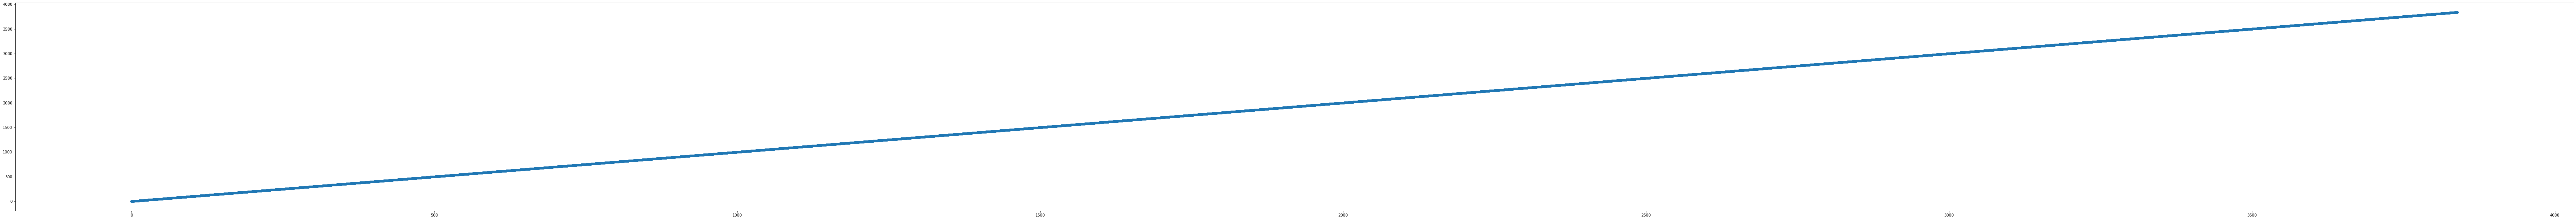

In [456]:
import matplotlib.pyplot as plt
plt.figure(figsize=(120,10))
plt.scatter(range(len(num)), [a[0] for a in num])
plt.show()